**Import Modules**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

**Dataset: Features & Class Label**

In [20]:
car_df = pd.read_csv('/content/drive/MyDrive/CAR DETAILS .csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [21]:
car_df.drop(columns='transmission', inplace=True) # menghapus kolom bernama 'Id'
car_df.head() # tampilkan 5 baris pertama

,name,year,selling_price,km_driven,fuel,seller_type,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Second Owner


In [22]:
car_df.drop(columns='name', inplace=True) # menghapus kolom bernama 'Id'
car_df.head() # tampilkan 5 baris pertama

,year,selling_price,km_driven,fuel,seller_type,owner
0,2007,60000,70000,Petrol,Individual,First Owner
1,2007,135000,50000,Petrol,Individual,First Owner
2,2012,600000,100000,Diesel,Individual,First Owner
3,2017,250000,46000,Petrol,Individual,First Owner
4,2014,450000,141000,Diesel,Individual,Second Owner


In [23]:
car_df.drop(columns='fuel', inplace=True) # menghapus kolom bernama 'Id'
car_df.head() # tampilkan 5 baris pertama

,year,selling_price,km_driven,seller_type,owner
0,2007,60000,70000,Individual,First Owner
1,2007,135000,50000,Individual,First Owner
2,2012,600000,100000,Individual,First Owner
3,2017,250000,46000,Individual,First Owner
4,2014,450000,141000,Individual,Second Owner


In [24]:
car_df.drop(columns='seller_type', inplace=True) # menghapus kolom bernama 'Id'
car_df.head() # tampilkan 5 baris pertama

,year,selling_price,km_driven,owner
0,2007,60000,70000,First Owner
1,2007,135000,50000,First Owner
2,2012,600000,100000,First Owner
3,2017,250000,46000,First Owner
4,2014,450000,141000,Second Owner


In [25]:
car_df.drop(columns='owner', inplace=True) # menghapus kolom bernama 'Id'
car_df.head() # tampilkan 5 baris pertama

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000


In [26]:
X = car_df.drop(columns='year') # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,selling_price,km_driven
0,60000,70000
1,135000,50000
2,600000,100000
3,250000,46000
4,450000,141000


In [27]:
y = car_df['year'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    2007
1    2007
2    2012
3    2017
4    2014
Name: year, dtype: int64

**Split the dataset into a training set and a testing set**

In [28]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(2604, 2)
(2604,)

testing dataset:
(1736, 2)
(1736,)


**K Nearest Neighbors**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

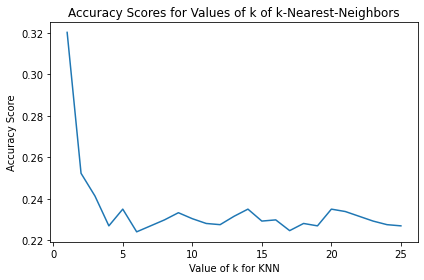

In [35]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [36]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

**Accuracy Score**

In [37]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.2413594470046083


**Confusion Matrix**

In [38]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0  0  1  2  0  1  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  2
   0  0  0]
 [ 0  0  0  0  0  0  1  2  3  0  0  2  1  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  1  0  1  1  2  1  1  4  1  0  0  1  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  6  2  4  4  0  0  1  0  1  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  2  0  0  2  0  2  1 16  3  4  1  0  1  

**Classification Report**

In [39]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

        1992       0.00      0.00      0.00         0
        1995       0.00      0.00      0.00         0
        1996       0.00      0.00      0.00         1
        1997       0.00      0.00      0.00         2
        1998       0.00      0.00      0.00         4
        1999       0.00      0.00      0.00         4
        2000       0.00      0.00      0.00         4
        2001       0.07      0.10      0.08        10
        2002       0.15      0.30      0.20        10
        2003       0.09      0.15      0.11        13
        2004       0.26      0.32      0.29        19
        2005       0.29      0.40      0.33        40
        2006       0.15      0.22      0.18        49
        2007       0.16      0.19      0.17        57
        2008       0.12      0.19      0.15        54
        2009       0.14      0.17      0.16        75
        2010       0.06      0.07      0.07        98
        2011       0.18    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:

# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Accuracy Score**

In [42]:
print(accuracy_score(y_test, y_pred))

0.17972350230414746


**Confusion Matrix**

In [43]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   1   0   0   0   1   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   2   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   2   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0   1   2   0   0
    0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   3   0   0   1   4   1   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   1   0   0   0   5   1   0
    0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0   3  10   1   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5  10   0  

**Classification Report**

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1996       0.00      0.00      0.00         1
        1997       0.00      0.00      0.00         2
        1998       0.00      0.00      0.00         4
        1999       0.00      0.00      0.00         4
        2000       0.00      0.00      0.00         4
        2001       0.00      0.00      0.00        10
        2002       0.00      0.00      0.00        10
        2003       0.00      0.00      0.00        13
        2004       0.00      0.00      0.00        19
        2005       0.00      0.00      0.00        40
        2006       0.24      0.31      0.27        49
        2007       0.13      0.12      0.13        57
        2008       0.00      0.00      0.00        54
        2009       0.00      0.00      0.00        75
        2010       0.03      0.01      0.02        98
        2011       0.12      0.25      0.16       102
        2012       0.17      0.46      0.25       163
        2013       0.09    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Classifier**

In [45]:
from sklearn.svm import SVC

In [46]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

**Decision Tree Classifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

**Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

**Accuracy comparision for various models**

In [51]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.2413594470046083, 0.17972350230414746, 0.17857142857142858, 0.315668202764977, 0.32315668202764974]


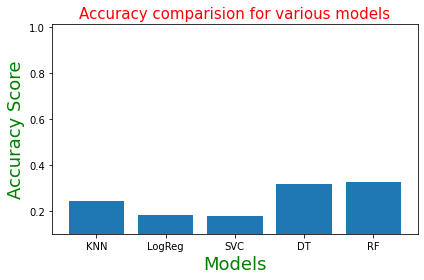

In [54]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.10,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()